<a href="https://colab.research.google.com/github/SEAFARI/spam-ham-prediction/blob/main/spam_mail_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data collection and pre-processing

In [4]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [5]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [6]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [7]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Label Encoding

spam - 0

ham - 1

In [9]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [10]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [11]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data & test data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [13]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [14]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)  #no need to fit it again

# convert Y_train and Y_test values as integers    . it'll be easier for the machine for int as Y is an object datatype. see up

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [15]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34895 stored elements and shape (4457, 7496)>
  Coords	Values
  (0, 4768)	0.2885879313347367
  (0, 7438)	0.2996693624522654
  (0, 2262)	0.49316930861935127
  (0, 3764)	0.22046319970004669
  (0, 2823)	0.5172500796081709
  (0, 7289)	0.5172500796081709
  (1, 3317)	0.3290434493347565
  (1, 4972)	0.49481520325330874
  (1, 1558)	0.42364007209989546
  (1, 6517)	0.49481520325330874
  (1, 4136)	0.4717788963273523
  (2, 3103)	0.17628376831968728
  (2, 841)	0.26799944639874834
  (2, 4099)	0.186263215205624
  (2, 3086)	0.27449720225122765
  (2, 2136)	0.180851695270251
  (2, 3398)	0.20665621299033204
  (2, 4269)	0.2543939099135892
  (2, 3118)	0.18009671431232455
  (2, 3935)	0.3671145612703168
  (2, 3722)	0.24768901862403342
  (2, 6641)	0.20096909705626312
  (2, 1430)	0.28509060215711635
  (2, 5837)	0.1845655907506494
  (2, 4943)	0.33789703751914013
  :	:
  (4454, 841)	0.21705430485365426
  (4454, 3514)	0.17954863693268575
  (4454, 7163)	

Training the Model

Logistic Regression

In [16]:
model = LogisticRegression()

In [17]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [18]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [19]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9672425398249944


In [20]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [21]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9704035874439462


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, prediction_on_test_data))
print("-"*54)
print("confusion matrix: \n",confusion_matrix(Y_test, prediction_on_test_data))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

------------------------------------------------------
confusion matrix: 
 [[118  31]
 [  2 964]]


Building a Predictive System

In [23]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


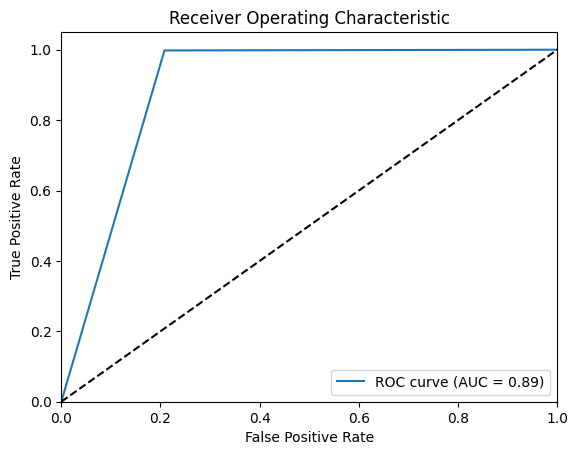

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, _ = roc_curve(Y_test, prediction_on_test_data)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()